                            OLS Regression Results                            
Dep. Variable:                log_GDP   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     61.10
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.79e-06
Time:                        22:27:44   Log-Likelihood:                 21.187
No. Observations:                  16   AIC:                            -38.37
Df Residuals:                      14   BIC:                            -36.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.0389      0.049    533.397      

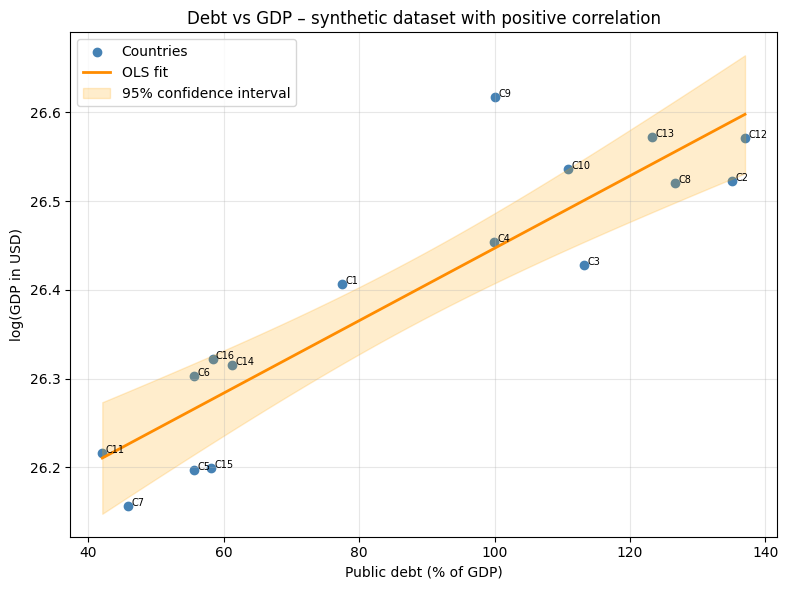

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1) Synthetic but realistic dataset
# =========================
np.random.seed(42)

countries = ["C" + str(i) for i in range(1, 17)]
debt_ratio = np.random.uniform(40, 140, size=16)

# Construct a relationship between debt and GDP
# (log(GDP) = 26 + 0.005 * debt + noise)
log_gdp = 26 + 0.005 * debt_ratio + np.random.normal(scale=0.08, size=16)
gdp = np.exp(log_gdp)

df = pd.DataFrame(
    {
        "Country": countries,
        "Debt_to_GDP": debt_ratio,
        "GDP_USD": gdp,
        "log_GDP": log_gdp,
    }
)

# =========================
# 2) Linear regression: log(GDP) ~ Debt_to_GDP
# =========================
X = sm.add_constant(df["Debt_to_GDP"])
y = df["log_GDP"]
model = sm.OLS(y, X).fit()
print(model.summary())

# =========================
# 3) Confidence interval
# =========================
x_line = np.linspace(df["Debt_to_GDP"].min(), df["Debt_to_GDP"].max(), 100)
X_pred = sm.add_constant(x_line)
pred = model.get_prediction(X_pred).summary_frame(alpha=0.05)

# =========================
# 4) Plot
# =========================
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df["Debt_to_GDP"], df["log_GDP"], color="steelblue", label="Countries")

# Regression line
plt.plot(x_line, pred["mean"], color="darkorange", linewidth=2, label="OLS fit")

# Confidence interval (95%)
plt.fill_between(
    x_line,
    pred["mean_ci_lower"],
    pred["mean_ci_upper"],
    color="orange",
    alpha=0.2,
    label="95% confidence interval",
)

# Labels
for _, row in df.iterrows():
    plt.text(row["Debt_to_GDP"] + 0.5, row["log_GDP"], row["Country"], fontsize=7)

plt.xlabel("Public debt (% of GDP)")
plt.ylabel("log(GDP in USD)")
plt.title("Debt vs GDP – synthetic dataset with positive correlation")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()